<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. 

Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h1 style="color: #FF8C00;">Libraries</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

              Asset1  Asset2     Asset3  Asset4  Asset5
date                                                   
2019-01-02  231.5061  55.875  25.649222  302.93   50.89
2019-01-03  231.0356  54.977  25.503047  302.11   50.41
2019-01-04  230.4026  56.129  26.147133  301.77   51.38
2019-01-07  230.0543  56.838  25.955277  302.33   52.14
2019-01-08  229.7012  56.895  26.137997  303.42   52.13
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 783 entries, 2019-01-02 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Asset1  770 non-null    float64
 1   Asset2  770 non-null    float64
 2   Asset3  770 non-null    float64
 3   Asset4  734 non-null    float64
 4   Asset5  763 non-null    float64
dtypes: float64(5)
memory usage: 36.7 KB
None


<Figure size 1200x600 with 0 Axes>

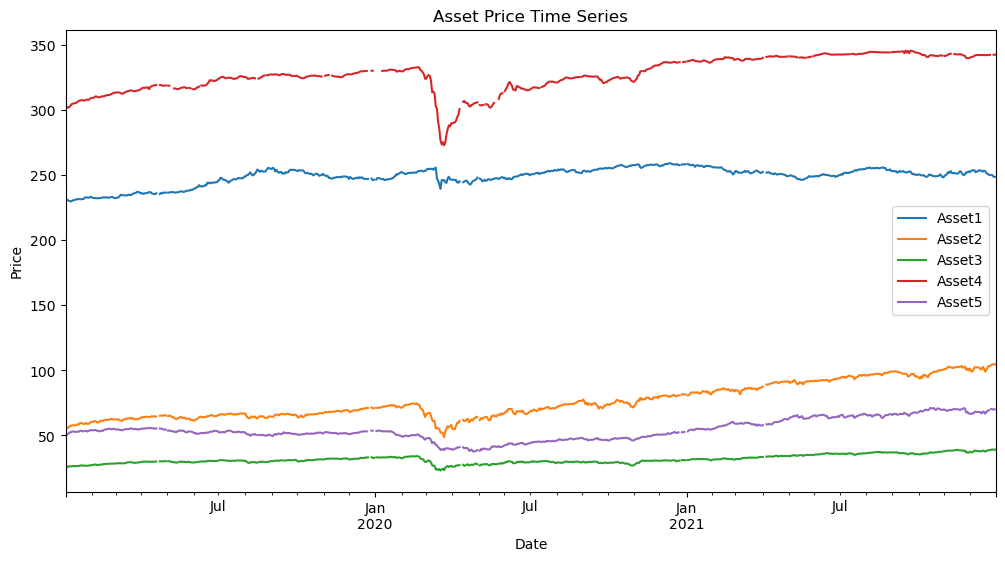

<Figure size 1200x600 with 0 Axes>

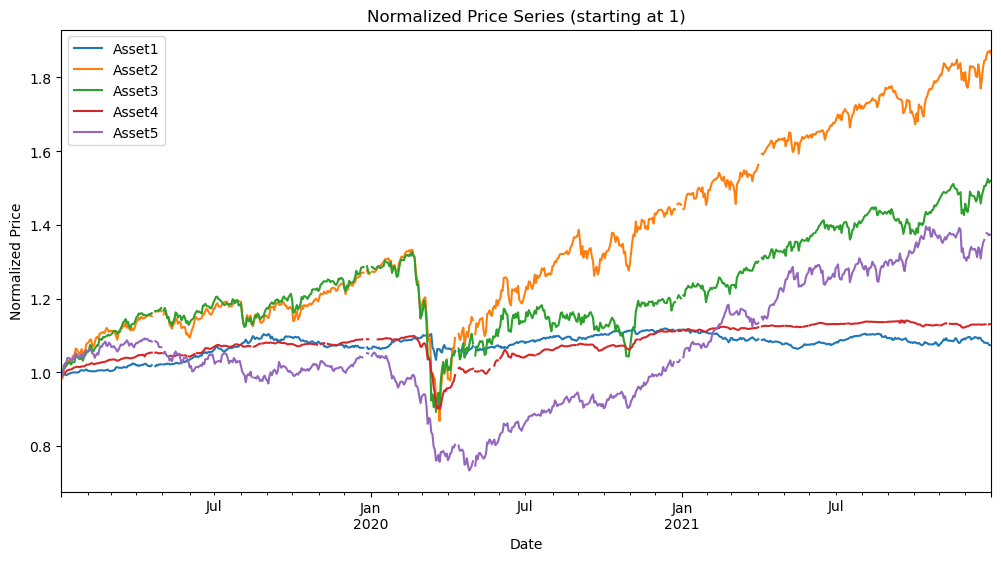

In [2]:
df = pd.read_csv("/home/rafael/Área de Trabalho/CUROS IRONHACK/SEMANA_11/project/asset_price_data.csv", parse_dates=["date"], index_col="date")

print(df.head())
print(df.info())

# ============================
# Plot Raw Price Data
# ============================

plt.figure(figsize=(12,6))
df.plot(title="Asset Price Time Series", figsize=(12,6))
plt.ylabel("Price")
plt.xlabel("Date")
plt.show()

# ============================
# Normalize Price Series
# ============================

normalized_df = df / df.iloc[0]   # divide by first row for each asset

plt.figure(figsize=(12,6))
normalized_df.plot(title="Normalized Price Series (starting at 1)", figsize=(12,6))
plt.ylabel("Normalized Price")
plt.xlabel("Date")
plt.show()


<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>

In [3]:
daily_returns = df.pct_change().dropna()
daily_returns.head()

/tmp/ipykernel_33828/4028424277.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = df.pct_change().dropna()


,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-03,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2019-01-04,-0.002740,0.020954,0.025255,-0.001125,0.019242
2019-01-07,-0.001512,0.012632,-0.007338,0.001856,0.014792
2019-01-08,-0.001535,0.001003,0.007040,0.003605,-0.000192
2019-01-09,0.001976,0.012919,0.002272,0.004120,0.014003


<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>

In [4]:
correlation_matrix = daily_returns.corr()
print(correlation_matrix)

          Asset1    Asset2    Asset3    Asset4    Asset5
Asset1  1.000000 -0.088341 -0.061253  0.102252 -0.106484
Asset2 -0.088341  1.000000  0.852491  0.526634  0.591399
Asset3 -0.061253  0.852491  1.000000  0.511550  0.557414
Asset4  0.102252  0.526634  0.511550  1.000000  0.421155
Asset5 -0.106484  0.591399  0.557414  0.421155  1.000000


<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>

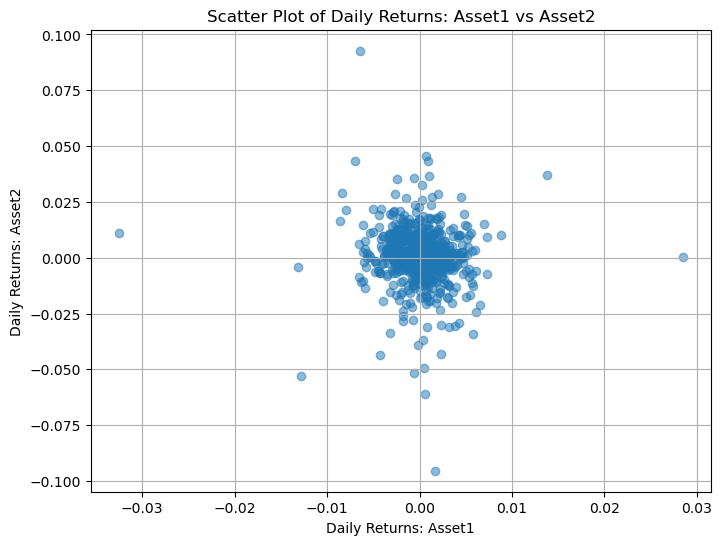

In [12]:
asset_x = "Asset1"   
asset_y = "Asset2"   
#asset_y = "Asset3"   
#asset_y = "Asset4"   
#asset_y = "Asset5"   

plt.figure(figsize=(8,6))
plt.scatter(daily_returns[asset_x], daily_returns[asset_y], alpha=0.5)
plt.xlabel(f"Daily Returns: {asset_x}")
plt.ylabel(f"Daily Returns: {asset_y}")
plt.title(f"Scatter Plot of Daily Returns: {asset_x} vs {asset_y}")
plt.grid(True)
plt.show()

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>

In [6]:
# Insert your code here

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>

In [7]:
# Insert your code here

<h2 style="color: #FF6347;">Annualized Return.</h2>

In [8]:
# Insert your code here

<h2 style="color: #FF6347;">Annualized Volatility.</h2>

In [9]:
# Insert your code here

<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>

In [ ]:
# Insert your code here